In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [128]:
# df = pd.read_csv('/home/eduardo/TESIS/git/AutoNOMOS/src/histogramfilter_mov20_mejor.txt', sep='\t')
df = pd.read_csv('../histogramfilter_filtrado.txt', sep='\t')

In [129]:
df.head()

,Unnamed: 0,Est_0,Est_1,Est_2,Est_3,Est_4,Est_5,Est_6,Est_7,Est_8,...,dist_x_prob,pix_x_prob,state,ctrl_st,car_or,pose_x,pose_y,pose_yaw,diff_x_real,pix_x_real
0,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.00,0.00000,0.0,0.0,0.0,0.00,0.00000,0.00000,0.00,0.00
1,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.00,0.00000,0.0,0.0,0.0,0.00,0.00000,0.00000,0.00,0.00
2,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.00,0.00000,0.0,0.0,0.0,0.75,-3.74992,1.57079,0.00,0.00
3,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,-0.75,-139.99988,0.0,0.0,0.0,0.75,-3.74992,1.57079,0.75,0.75
4,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.00,0.00000,0.0,0.0,0.0,0.75,-3.74991,1.57079,0.75,0.75


In [130]:
# global pose
inicio = 0
fin = 500

X = df['pose_x'].values[inicio:fin]
Y = df['pose_y'].values[inicio:fin]
Yaw = df['pose_yaw'].values[inicio:fin]

localization_hist = df.iloc[inicio:fin, 1:155].as_matrix()

In [131]:
# odometry
odom_X = df['odom_y'].values[inicio:fin]
odom_Y = df['odom_x'].values[inicio:fin]

odom_Yaw = df['odom_theta'].values[inicio:fin]
odom_Yaw = pd.DataFrame({'odom_theta': [1.57] * len(odom_Yaw)})

odom_x_corregida = 0.74 - odom_Y
odom_y_corregida = 0.008 + odom_X

U = np.cos(Yaw)
V = np.sin(Yaw)

odom_U = np.cos(odom_Yaw)
odom_V = np.sin(odom_Yaw)

odom_U_c = np.cos(1.57 + odom_Yaw)
odom_V_c = np.sin(1.57 + odom_Yaw)

In [132]:
df.loc[100:110, ['pose_x']]

,pose_x
100,0.62558
101,0.62426
102,0.62304
103,0.62114
104,0.61901
105,0.61729
106,0.61573
107,0.61421
108,0.61244
109,0.61064


In [133]:
cell_width = 0.008571428571428572
df.loc[100:110, ['pose_x']].diff().apply( lambda x: x / cell_width)
#df['pose_x'].diff().head()

,pose_x
100,NaN
101,-0.154000
102,-0.142333
103,-0.221667
104,-0.248500
105,-0.200667
106,-0.182000
107,-0.177333
108,-0.206500
109,-0.210000


In [134]:
df.loc[100:110, ['dist_x_prob', 'pix_x_prob']]

,dist_x_prob,pix_x_prob
100,0.00052,0.09669
101,0.00066,0.12410
102,0.00132,0.24667
103,0.00121,0.22607
104,0.00190,0.35555
105,0.00213,0.39781
106,0.00172,0.32054
107,0.00156,0.29185
108,0.00152,0.28369
109,0.00177,0.33004


In [135]:
df.loc[100:110, ['pose_x', 'diff_x_real']]

,pose_x,diff_x_real
100,0.62558,0.62624
101,0.62426,0.62558
102,0.62304,0.62426
103,0.62114,0.62304
104,0.61901,0.62114
105,0.61729,0.61901
106,0.61573,0.61729
107,0.61421,0.61573
108,0.61244,0.61421
109,0.61064,0.61244


cell_width: 0.008571428571428572


/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


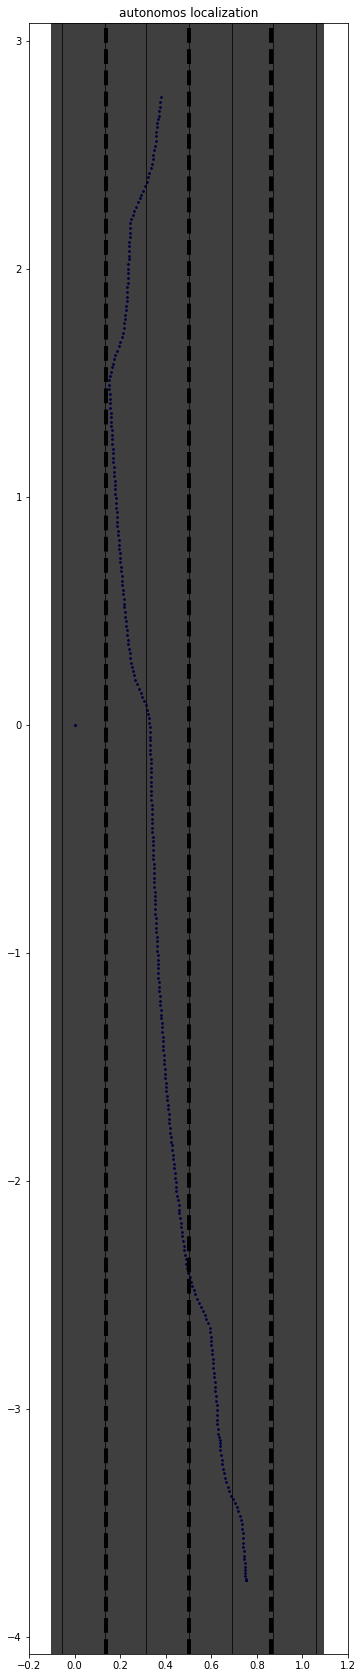

In [136]:
right_x = 0.86
center_x = 0.5
left_x = 0.14
out_road_dist = 0.24
num_states = 7
state_width = 20

lines_y = [Y[0], Y[len(Y)-1]] 
cell_width = ((right_x + out_road_dist) - (left_x - out_road_dist)) / (num_states * state_width)
print("cell_width: {}".format(cell_width))
cell_height = abs(np.mean([Y[i] - Y[i + 1] for i in range(len(Y)-1)]))

points_x = np.arange(left_x - out_road_dist, right_x + out_road_dist, cell_width)
grid_x, grid_y = np.meshgrid(points_x, np.arange(Y[0], Y[len(Y)-1], cell_height))

plt.figure(figsize=(20, 30))
plt.title("autonomos localization")


# show probabilistic localization
z = localization_hist.flatten() * 254
# colors = plt.cm.get_cmap('Blues')(z)
# plt.scatter(grid_x, grid_y,  marker=',', s=10, c=colors)

# lines of road



# show orientation
# from global pose
# Q = plt.quiver(X, Y, U, V, color='r', pivot='mid', units='xy', scale=40, width=.009)
# from odometry
# Q = plt.quiver(odom_x_corregida, odom_y_corregida, odom_U_c, odom_V_c, color='b', pivot='mid', units='xy', scale=40, width=.009)

plt.scatter(X, Y, color='b', s=3)
#qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')

# plt.scatter(odom_x_corregida, odom_y_corregida, color='r', s=1)

plt.axes().set_xlim([-0.2, 1.2])
plt.axes().set_aspect('equal')

plt.axvline(right_x, color='k', linestyle='dashed', linewidth=4) #'k--', linewidth=4)
plt.axvline(center_x, color='k', linestyle='dashed', linewidth=4) #'k--', linewidth=4)
plt.axvline(left_x, color='k', linestyle='dashed', linewidth=4)  #'k--', linewidth=4)

for x_i in points_x:
    plt.axvline(x_i, color='k', linestyle='solid')

#f, ax = plt.subplots() # figsize=(20, 30)

# Q = ax.quiver(odom_X, odom_Y, odom_U, odom_V, color='b', pivot='mid', 
#              units='xy', scale=40, width=.009)

#ax.set_title("Odometry")
#ax.set_aspect('equal')

plt.show()